In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import mesa
from rock_scissors_paper.model_original import RockScissorsPaperO

In [3]:
model_params = {
    "height": 100,
    "width": 100,
    "hex": False,
    "init0": 0.2,
    "init1": 0.5,
    "init2": 0.3,
    "inv0": 0.5,
    "inv1": 0.3,
    "inv2": 0.2,
    "color_map": {
        0: 'red',
        1: 'purple',
        2: 'yellow',
    }
}
results = mesa.batch_run(
    RockScissorsPaperO,
    parameters=model_params,
    iterations=1,
    max_steps=200,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df= pd.DataFrame(results)
results_df.rename(columns={0: "rock", 1: "scissors", 2: "paper"}, inplace=True)
results_df

  0%|          | 0/3 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,init0,init1,init2,inv0,inv1,inv2,color_map,rock,scissors,paper
0,0,0,0,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,0,2015,4978,3007
1,0,0,1,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,0,2429,4877,2694
2,0,0,2,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,0,2904,4660,2436
3,0,0,3,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,0,3412,4327,2261
4,0,0,4,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,0,3922,3918,2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2,0,196,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,2,3250,1580,5170
599,2,0,197,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,2,3181,1585,5234
600,2,0,198,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,2,3148,1588,5264
601,2,0,199,100,100,False,0.2,0.5,0.3,0.5,0.3,0.2,2,3095,1618,5287


<Axes: >

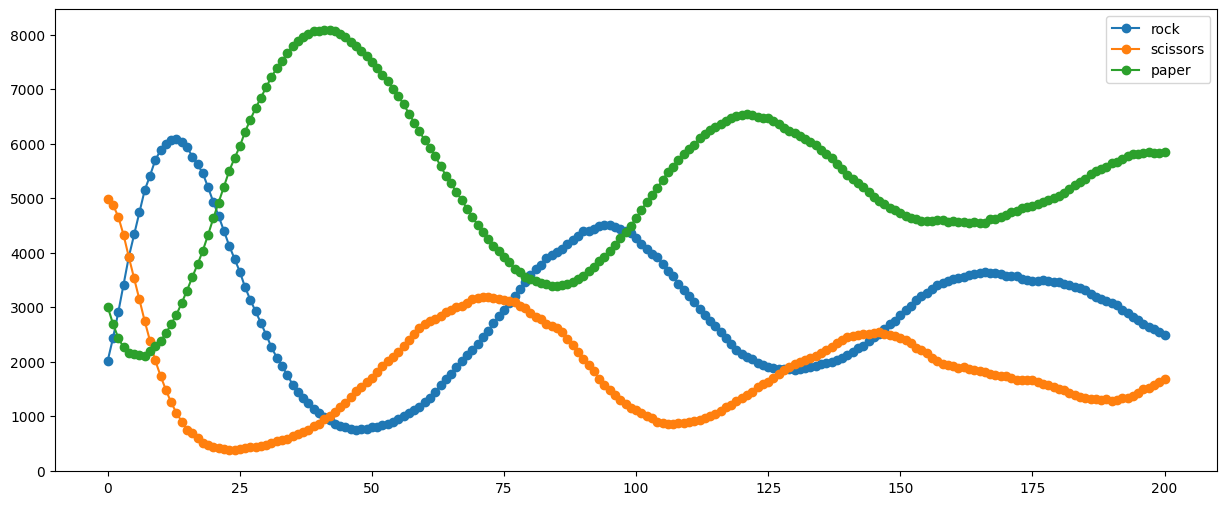

In [4]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[results_df["RunId"]==0][["rock", "scissors", "paper"]].plot(ax=axs, style='-o')

In [5]:
fig = px.scatter_ternary(
    results_df[results_df["RunId"]==0],
    a="paper",
    b="rock",
    c="scissors",
    color=results_df[results_df["RunId"]==0].index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))